In [50]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [51]:
tickers = ['ITUB4.SA', 'EGIE3.SA', 'LEVE3.SA', 'WEGE3.SA', 'VALE3.SA', 'PETR4.SA', '^BVSP']
dataset = yf.download(tickers, start = '2019-01-01')['Adj Close']
dataset = dataset.rename(columns={'^BVSP': 'IBOVESPA'})
dataset

[*********************100%%**********************]  7 of 7 completed


Ticker,EGIE3.SA,ITUB4.SA,LEVE3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,IBOVESPA
Date,,,,,,,
2019-01-02,24.303654,29.070147,15.338502,8.039103,32.182255,8.256762,91012.0
2019-01-03,25.100962,29.549416,15.299003,8.236240,30.865740,8.445042,91564.0
2019-01-04,25.639868,29.054440,15.322714,8.259629,32.875160,8.541476,91841.0
2019-01-07,25.481054,29.109434,15.304931,8.389940,32.698784,8.408302,91699.0
2019-01-08,25.769800,29.478695,15.500538,8.339818,33.013741,8.339417,92032.0
...,...,...,...,...,...,...,...
2024-11-29,38.000000,32.582348,27.129999,38.900002,58.779999,53.939999,125668.0
2024-12-02,37.360001,32.119999,26.879999,39.150002,58.919998,53.849998,125236.0
2024-12-03,37.820000,32.480000,26.450001,39.500000,58.470001,54.599998,126139.0


In [52]:
dataset_normalized = dataset.copy()
for i in dataset.columns:
  dataset_normalized[i] = dataset[i] / dataset[i][0]
dataset_normalized

C:\Users\Augusto\AppData\Local\Temp\ipykernel_16776\750179469.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Ticker,EGIE3.SA,ITUB4.SA,LEVE3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,IBOVESPA
Date,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.032806,1.016487,0.997425,1.024522,0.959092,1.022803,1.006065
2019-01-04,1.054980,0.999460,0.998971,1.027432,1.021531,1.034483,1.009109
2019-01-07,1.048445,1.001351,0.997811,1.043641,1.016050,1.018354,1.007548
2019-01-08,1.060326,1.014054,1.010564,1.037407,1.025837,1.010011,1.011207
...,...,...,...,...,...,...,...
2024-11-29,1.563551,1.120818,1.768752,4.838849,1.826472,6.532827,1.380785
2024-12-02,1.537217,1.104914,1.752453,4.869947,1.830823,6.521927,1.376038
2024-12-03,1.556145,1.117297,1.724419,4.913484,1.816840,6.612762,1.385960


In [53]:
dataset_return = (dataset_normalized / dataset_normalized.shift(1)) - 1
dataset_return

Ticker,EGIE3.SA,ITUB4.SA,LEVE3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,IBOVESPA
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.032806,0.016487,-0.002575,0.024522,-0.040908,0.022803,0.006065
2019-01-04,0.021470,-0.016751,0.001550,0.002840,0.065102,0.011419,0.003025
2019-01-07,-0.006194,0.001893,-0.001161,0.015777,-0.005365,-0.015591,-0.001546
2019-01-08,0.011332,0.012685,0.012781,-0.005974,0.009632,-0.008192,0.003631
...,...,...,...,...,...,...,...
2024-11-29,0.011984,-0.002448,0.013827,0.008033,0.021728,0.019467,0.008490
2024-12-02,-0.016842,-0.014190,-0.009215,0.006427,0.002382,-0.001669,-0.003438
2024-12-03,0.012313,0.011208,-0.015997,0.008940,-0.007637,0.013928,0.007210


In [54]:
dataset_return.fillna(0, inplace=True)
dataset_return.head()

Ticker,EGIE3.SA,ITUB4.SA,LEVE3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,IBOVESPA
Date,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,0.032806,0.016487,-0.002575,0.024522,-0.040908,0.022803,0.006065
2019-01-04,0.021470,-0.016751,0.001550,0.002840,0.065102,0.011419,0.003025
2019-01-07,-0.006194,0.001893,-0.001161,0.015777,-0.005365,-0.015591,-0.001546
2019-01-08,0.011332,0.012685,0.012781,-0.005974,0.009632,-0.008192,0.003631


In [55]:
dataset_return.mean() * 252

Ticker
EGIE3.SA    0.104921
ITUB4.SA    0.071897
LEVE3.SA    0.178469
PETR4.SA    0.365278
VALE3.SA    0.172206
WEGE3.SA    0.389621
IBOVESPA    0.088789
dtype: float64

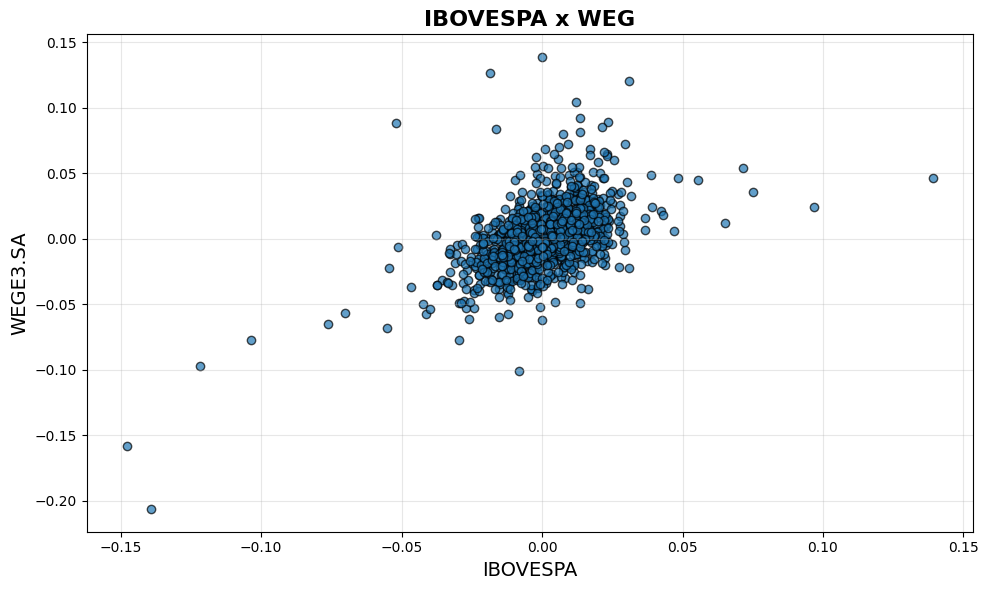

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_return['IBOVESPA'], dataset_return['WEGE3.SA'], alpha=0.7, edgecolors='k', label='Data Points')
plt.title('IBOVESPA x WEG', fontsize=16, fontweight='bold')
plt.xlabel('IBOVESPA', fontsize=14)
plt.ylabel('WEGE3.SA', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
beta, alpha = np.polyfit(x = dataset_return['IBOVESPA'], y = dataset_return['WEGE3.SA'], deg = 1)
print('beta:', beta, 'alpha:', alpha, 'alpha (%):', alpha * 100)

beta: 0.7824366089216004 alpha: 0.0012704349727367342 alpha (%): 0.12704349727367342


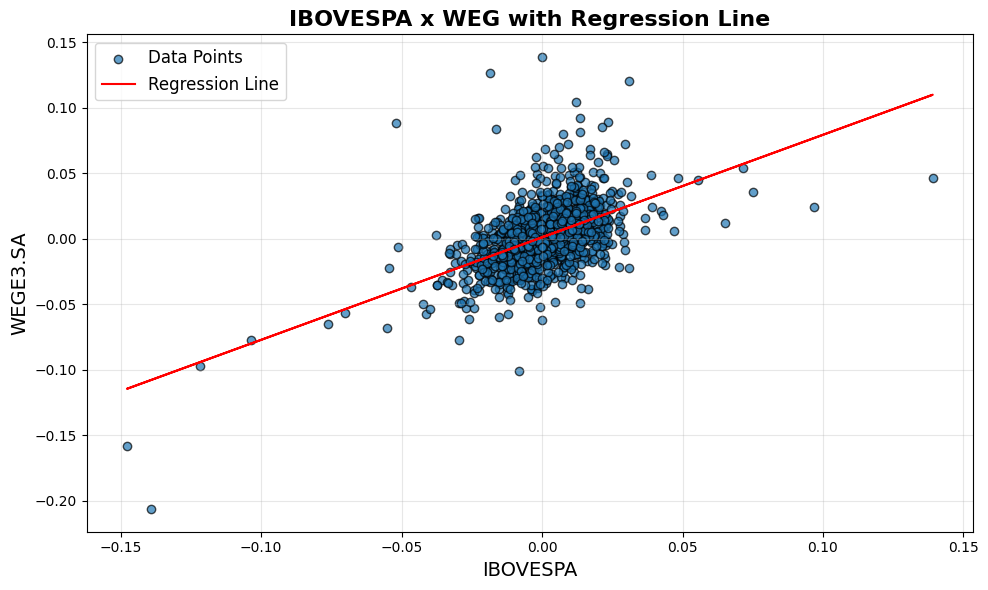

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_return['IBOVESPA'], dataset_return['WEGE3.SA'], alpha=0.7, edgecolors='k', label='Data Points')
plt.plot(dataset_return['IBOVESPA'], beta * dataset_return['IBOVESPA'] + alpha, color='red', label='Regression Line')

plt.title('IBOVESPA x WEG with Regression Line', fontsize=16, fontweight='bold')
plt.xlabel('IBOVESPA', fontsize=14)
plt.ylabel('WEGE3.SA', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
covaciance_matrix = dataset_return.drop(columns = ['ITUB4.SA', 'EGIE3.SA', 'LEVE3.SA', 'VALE3.SA', 'PETR4.SA']).cov() * 252
covaciance_matrix

Ticker,WEGE3.SA,IBOVESPA
Ticker,,
WEGE3.SA,0.131737,0.047586
IBOVESPA,0.047586,0.060817


In [60]:
weg_ibov_cov = covaciance_matrix.iloc[1, 0]
weg_ibov_cov

0.04758555502293868

In [61]:
ibov_variance = dataset_return['IBOVESPA'].var() * 252
ibov_variance

0.06081713774681871

In [62]:
beta_weg = weg_ibov_cov / ibov_variance
beta_weg

0.7824366089216002

In [63]:
rm = dataset_return['IBOVESPA'].mean() * 252
rm

0.08878868650675324

In [64]:
taxa_selic_historico = np.array([4.50, 2.00, 9.25, 13.75, 11.75, 11.25])
rf = taxa_selic_historico.mean() / 100
rf

0.0875

In [65]:
capm_weg = rf + (beta * (rm - rf))
capm_weg

0.08850831550030702

In [66]:
betas = []
alphas = []
for asset in dataset_return.columns[0:-1]:
  beta, alpha = np.polyfit(dataset_return['IBOVESPA'], dataset_return[asset], 1)
  betas.append(beta)
  alphas.append(alpha)

In [67]:
betas

[0.5585483793811784,
 0.94023350408488,
 0.7717068200168365,
 1.2694680997975454,
 0.9413777332298028,
 0.7824366089216004]

In [68]:
alphas

[0.00021955615859322672,
 -4.5972798788540304e-05,
 0.000436309106384919,
 0.0010022374007372075,
 0.00035167506937725716,
 0.0012704349727367342]

In [69]:
def visualize_beta_alpha(betas, alphas):
  for i, asset in enumerate(dataset_return.columns[0:-1]):
    print(asset, 'beta:', betas[i], 'alpha:', alphas[i] * 100)
visualize_beta_alpha(betas, alphas)

EGIE3.SA beta: 0.5585483793811784 alpha: 0.021955615859322673
ITUB4.SA beta: 0.94023350408488 alpha: -0.0045972798788540305
LEVE3.SA beta: 0.7717068200168365 alpha: 0.0436309106384919
PETR4.SA beta: 1.2694680997975454 alpha: 0.10022374007372076
VALE3.SA beta: 0.9413777332298028 alpha: 0.03516750693772572
WEGE3.SA beta: 0.7824366089216004 alpha: 0.12704349727367342


In [70]:
np.array(alphas).mean() * 100

0.05390399848401341

In [71]:
rf

0.0875

In [72]:
rm

0.08878868650675324

In [73]:
capm_companies = []
for i, asset in enumerate(dataset_return.columns[0:-1]):
  #print(i, ativo)
  capm_companies.append(rf + (betas[i] * (rm - rf)))

In [74]:
capm_companies

[0.08821979375987742,
 0.0887116662299115,
 0.08849448816612515,
 0.08913594641096277,
 0.0887131407825712,
 0.08850831550030702]

In [75]:
def visualize_capm(capm):
  for i, asset in enumerate(dataset_return.columns[0:-1]):
    print(asset, 'CAPM:', capm[i] * 100)

In [76]:
visualize_capm(capm_companies)

EGIE3.SA CAPM: 8.821979375987741
ITUB4.SA CAPM: 8.87116662299115
LEVE3.SA CAPM: 8.849448816612515
PETR4.SA CAPM: 8.913594641096276
VALE3.SA CAPM: 8.87131407825712
WEGE3.SA CAPM: 8.850831550030701


In [77]:
weights = np.array([0.17, 0.17, 0.17, 0.17, 0.17, 0.15])

In [78]:
capm_portfolio = np.sum(capm_companies * weights) * 100
capm_portfolio

8.863300333445222